En este experimento correremos kNN con distintos k para ciertos valores de K de K-Fold. Nuestra hipotesis a demostrar es que debido a la uniformidad de los dataset usados, deberiamos observar resultados parecidos tanto usando K-Fold como sin el. Primero corremos un script para el build de las librerias de c++ como modulos de python.
Analizaremos con mas profunidad estos resultados en el informe dado junto a esta entrega.

In [ ]:
!sh build.sh

Importamos librerias necesarias



In [9]:
import metnum
import pandas as pd
import time
from utils import get_MNIST_XY
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
import numpy as np
import metnum
from pathlib import Path

Obtenemos el dataset de mnist, en este caso, solo 10000 elementos por temas de tiempo de ejecucion.

In [10]:
X, y = get_MNIST_XY(0.8, 10000)

Seteamos los k que queremos testear y los distintos K de K-Fold

In [17]:
best_ks = [2,3,4,5,6]
kfold = [2]

Creamos una matriz de resultados donde guardar estos. En el eje X tendremos los k y en el eje y los K de k-fold. Cada celda representa el rendimiento de ejecutar kNN con ese k, utilizando K-Fold con K.

In [18]:
resultados = np.zeros((len(best_ks), len(kfold)))

In [19]:
for index_k, k in enumerate(best_ks):
    print(f'Current k: {k}')
    for index_K, split in enumerate(kfold):
        print(f'Current K: {split}')
        kf = KFold(n_splits=split, shuffle=True)
        accuracies_by_split = 0
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            clf_metnum = metnum.KNNClassifier(k)
            clf_metnum.fit(X_train, y_train)
            accuracies_by_split += accuracy_score(clf_metnum.predict(X_test), y_test)

        resultados[index_k, index_K]= accuracies_by_split / split

Current k: 2
Current K: 2
Current k: 3
Current K: 2
Current k: 4
Current K: 2
Current k: 5
Current K: 2
Current k: 6
Current K: 2


In [20]:
resultados

array([[0.938 ],
       [0.9365],
       [0.9376],
       [0.9335],
       [0.9349]])

Generamos graficos para mostrar los rendimientos dichos con anterioridad, los graficos mostrados en el informe son iguales pero con labels en cada barra para mostrar valores exactos.

In [24]:
def graficar(x,y, k):
    plt.clf()
    plt.ylim(0.8)
    plt.yticks([0.8, 0.85, 0.9, 0.95])
    plt.title(f'Accuracies para k = {k} para distinto K de k-fold')
    plt.bar(x, y)
    plt.show()

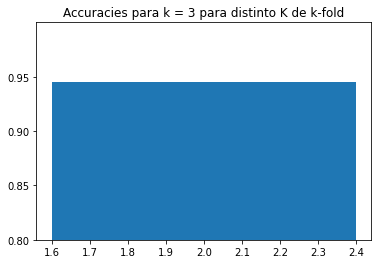

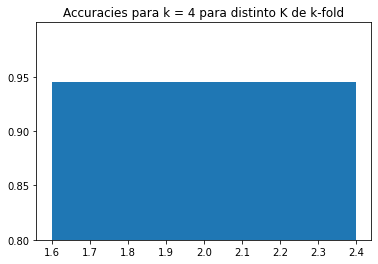

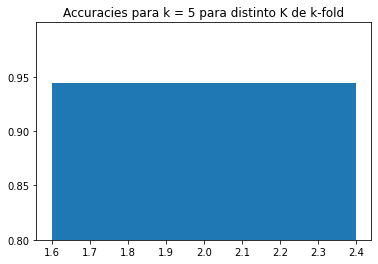

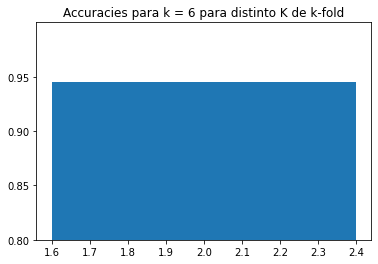

In [25]:
accuracies_k_2 = resultados[0].tolist()
accuracies_k_3= resultados[1].tolist()
accuracies_k_4= resultados[2].tolist()
accuracies_k_5= resultados[3].tolist()
accuracies_k_6= resultados[4].tolist()

# Estos resultados fueron obtenidos de experimentos anteriores, dado que no poseen kfold.
accuracies_k_2.insert(0, 0.9445) 
accuracies_k_3.insert(0, 0.9455)
accuracies_k_4.insert(0, 0.9455)
accuracies_k_5.insert(0, 0.9445)
accuracies_k_6.insert(0, 0.9455)

Kfolds = ['Sin K-Fold', '5', '10', '15', '20']
graficar(kfold, accuracies_k_3, 3)
graficar(kfold, accuracies_k_4, 4)
graficar(kfold, accuracies_k_5, 5)
graficar(kfold, accuracies_k_6, 6)